### Notebook - Table of Content

1. [**Importing necessary libraries**](#1.-Importing-necessary-libraries)   
2. [**Loading data**](#2.-Loading-data)  
3. [**Data preprocessing**](#3.-Data-preprocessing)  
    3.a[**Checking for duplicates**](#3.a-Checking-for-duplicates)
    3.b[**Checking for missing values**](#3.b-Checking-for-missing-values)
    3.c [**Checking for class imbalance**](#3.c-Checking-for-class-imbalance)
4. [**Exploratory Data Analysis**](#4.-Exploratory-Data-Analysis)  
    4.a [**Analysing tBodyAcc-sma() feature**](#4.a-Analysing-tBodyAcc-sma()-feature)  
    4.b [**Analysing Angle between X-axis and gravityMean feature**](#4.b-Analysing-Angle-between-X-axis-and-gravityMean-feature)  
    4.c [**Analysing Angle between Y-axis and gravityMean feature**](#4.c-Analysing-Angle-between-Y-axis-and-gravityMean-feature)   
    4.d [**Visualizing data using t-SNE**](#4.d-Visualizing-data-using-t-SNE)
5. [**ML models**](#5.-ML-models)  
    5.a [**Logistic regression model with Hyperparameter tuning and cross validation**](#5.a-Logistic-regression-model-with-Hyperparameter-tuning-and-cross-validation)  
    5.b [**Linear SVM model with Hyperparameter tuning and cross validation**](#5.b-Linear-SVM-model-with-Hyperparameter-tuning-and-cross-validation)  
    5.c [**Kernel SVM model with Hyperparameter tuning and cross validation**](#5.c-Kernel-SVM-model-with-Hyperparameter-tuning-and-cross-validation)   
    5.d [**Decision tree model with Hyperparameter tuning and cross validation**](#5.d-Decision-tree-model-with-Hyperparameter-tuning-and-cross-validation)  
    5.e [**Random forest model with Hyperparameter tuning and cross validation**](#5.e-Random-forest-model-with-Hyperparameter-tuning-and-cross-validation)  

### 1. Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
(train.shape, test.shape)

((7352, 563), (2947, 563))

### 3. Data preprocessing

#### 3.a Checking for duplicates

In [5]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ', sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


#### 3.b Checking for missing values

In [6]:
print('Total number of missing values in train : ', train.isnull().values.sum())
print('Total number of missing values in train : ', test.isnull().values.sum())

Total number of missing values in train :  0
Total number of missing values in train :  0


#### 3.c Checking for class imbalance

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

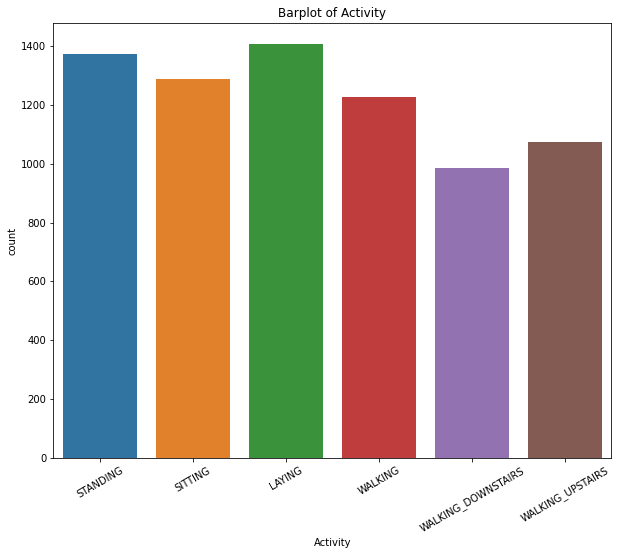

In [7]:
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train.Activity)
plt.xticks(rotation=30)

There is almost same number of observations across all the six activities so this data does not have class imbalance problem. 

### 4. Exploratory Data Analysis

Based on the common nature of activities we can broadly put them in two categories.
- **Static and dynamic activities : **
    - SITTING, STANDING, LAYING can be considered as static activities with no motion involved
    - WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved    
    
Let's consider **tBodyAcc-sma()** feature to differentiate among these two broader set of activities.(Took this feature randomly independent of X, Y, Z)


#### 4.a Analysing tBodyAcc-sma() feature

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

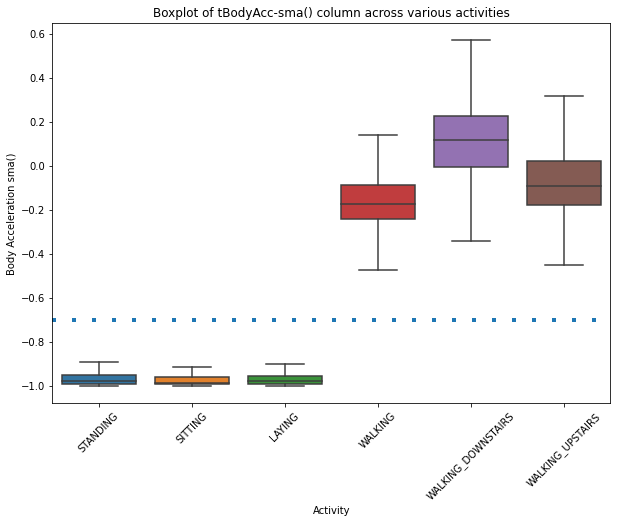

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAcc-sma()',data=train, showfliers=False)
plt.ylabel('Body Acceleration sma()')
plt.title("Boxplot of tBodyAcc-sma() column across various activities")
plt.axhline(y=-0.7, xmin=0,dashes=(1,4), linewidth = 4)
#plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=45)

Using boxplot we can come with conditions to seperate static activities from dynamic activities.

``` 
if(tBodyAcc-sma()<=-0.8):
    Activity = "static"
if(tBodyAcc-sma()>=-0.6):
    Activity = "dynamic"
``` 


#### 4.b Analysing Angle between X-axis and gravityMean feature

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

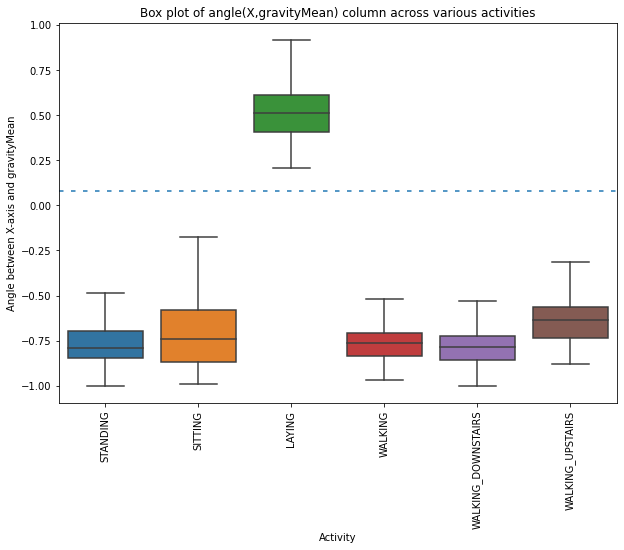

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0,dashes=(3,5))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 90)

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
``` 
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

#### 4.c Analysing Angle between Y-axis and gravityMean feature

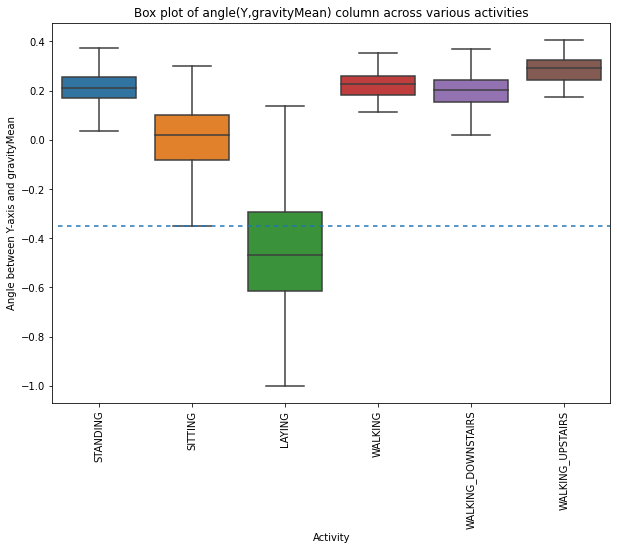

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))

Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.  

### 4.d Visualizing data using t-SNE

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information.
Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [11]:
from sklearn.manifold import TSNE

In [12]:
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)

In [13]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 12.6 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.317s...
[t-SNE] Computed neighbors for 7352 samples in 36.308s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125381
[t-SNE] KL divergence after 1000 iterations: 1.282858


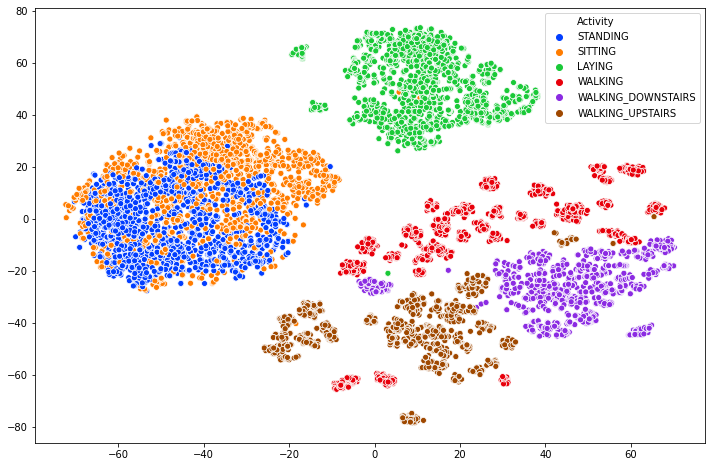

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

Using the two new components obtained through t-SNE we can visualize and seperate all the six activities in a 2D space. 

### 5. ML models

#### Getting training and test data ready

In [15]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


### 5.a Logistic regression model with Hyperparameter tuning and cross validation

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [17]:
parameters = {'C':np.array([30, 40, 50, 60, 70]), 'penalty':['l2','l1','elasticnet']}
#print(parameters)
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 30)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)


In [18]:

lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9579233118425518


In [19]:
cm = confusion_matrix(y_test.values,y_pred)


Text(0.5, 1.0, 'Confusion Matrix')

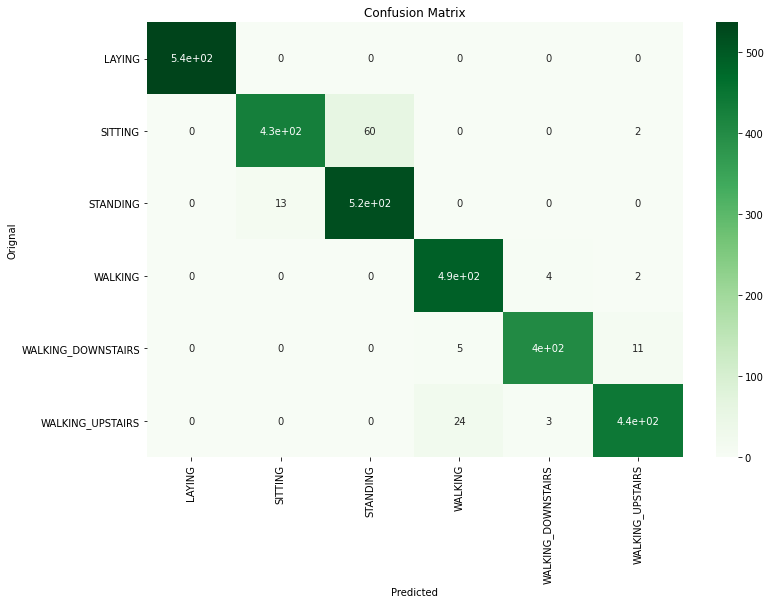

In [20]:
# plotting confusion matrix
plt.subplots(figsize = (12,8))
lables = np.unique(y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', xticklabels=lables, yticklabels=lables)
plt.ylabel('Orignal')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')


In [21]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [22]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(C=50)
Best set of parameters :  {'penalty': 'l2', 'C': 50}
Best score :  0.9333577509861865


### 5.b Linear SVM model with Hyperparameter tuning and cross validation

In [23]:
from sklearn.svm import LinearSVC

In [24]:
parameters = {'C':np.arange(1,12,2)}
lr_svm = LinearSVC(tol=0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions=parameters,random_state = 42)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

In [25]:
lr_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using linear SVM : ",lr_svm_accuracy)

Accuracy using linear SVM :  0.9687818120122158


Text(0.5, 1.0, 'Confusion Matrix')

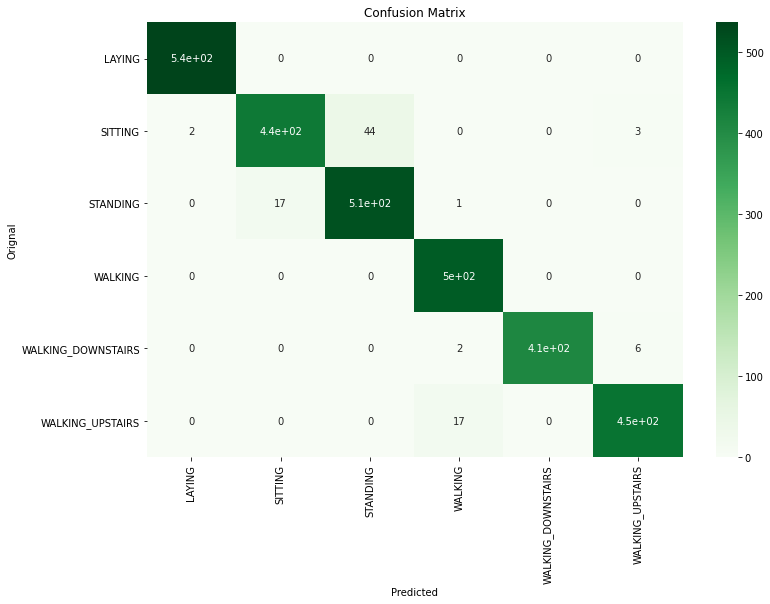

In [26]:
cm = confusion_matrix(y_test.values,y_pred)
# plotting confusion matrix
plt.subplots(figsize = (12,8))
lables = np.unique(y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', xticklabels=lables, yticklabels=lables)
plt.ylabel('Orignal')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

In [27]:
# getting best random search attributes
get_best_randomsearch_results(lr_svm_rs)

Best estimator :  LinearSVC(C=1, tol=5e-05)
Best set of parameters :  {'C': 1}
Best score :  0.9420637541216351


### 5.c Kernel SVM model with Hyperparameter tuning and cross validation

In [38]:
from sklearn.svm import SVC

In [39]:
np.linspace(2,22,6)

array([ 2.,  6., 10., 14., 18., 22.])

In [40]:
%time
parameters = {'C':[2,4,8,16],'gamma': [0.125, 0.250, 0.5, 1]}
kernel_svm = SVC(kernel='rbf')
kernel_svm_rs = RandomizedSearchCV(kernel_svm,param_distributions=parameters,random_state = 42)
kernel_svm_rs.fit(X_train, y_train)
y_pred = kernel_svm_rs.predict(X_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [41]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.9423142178486597


Text(0.5, 1.0, 'Confusion Matrix')

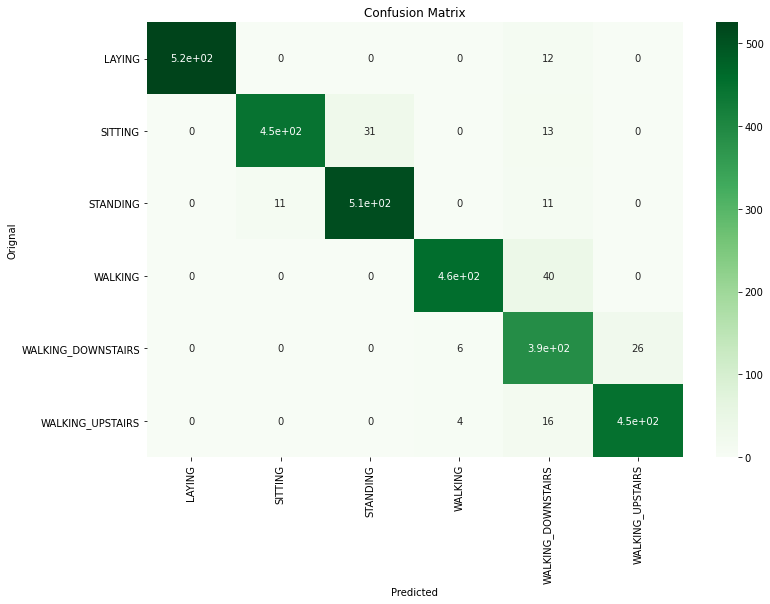

In [42]:
cm = confusion_matrix(y_test.values,y_pred)
# plotting confusion matrix
plt.subplots(figsize = (12,8))
lables = np.unique(y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', xticklabels=lables, yticklabels=lables)
plt.ylabel('Orignal')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

In [43]:
# getting best random search attributes
get_best_randomsearch_results(kernel_svm_rs)

Best estimator :  SVC(C=8, gamma=0.125)
Best set of parameters :  {'gamma': 0.125, 'C': 8}
Best score :  0.896632121237346


### 5.d Decision tree model with Hyperparameter tuning and cross validation

In [28]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [29]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8734306073973532


In [30]:
cm = confusion_matrix(y_test.values,y_pred)


Text(0.5, 1.0, 'Confusion Matrix')

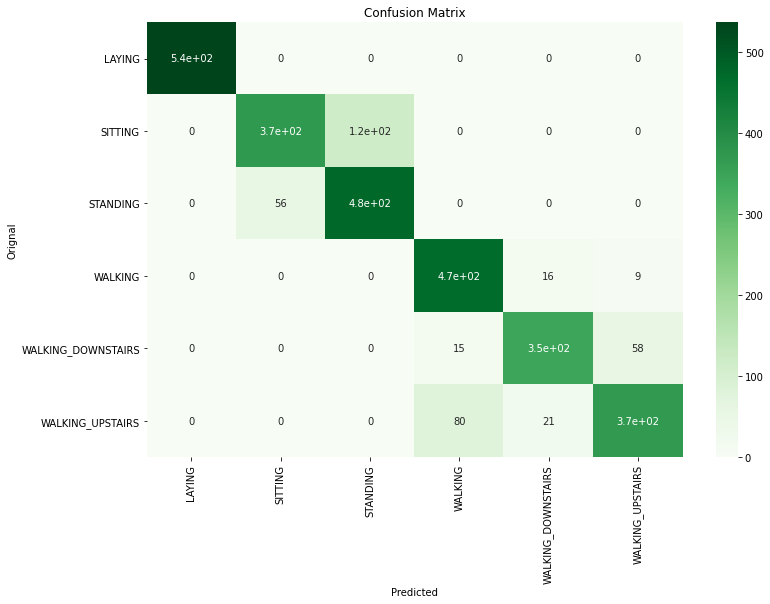

In [31]:

# plotting confusion matrix
plt.subplots(figsize = (12,8))
lables = np.unique(y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', xticklabels=lables, yticklabels=lables)
plt.ylabel('Orignal')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

In [32]:
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}
Best score :  0.8533825386034767


### 5.e Random forest model with Hyperparameter tuning and cross validation

In [33]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [34]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9216152019002375


Text(0.5, 1.0, 'Confusion Matrix')

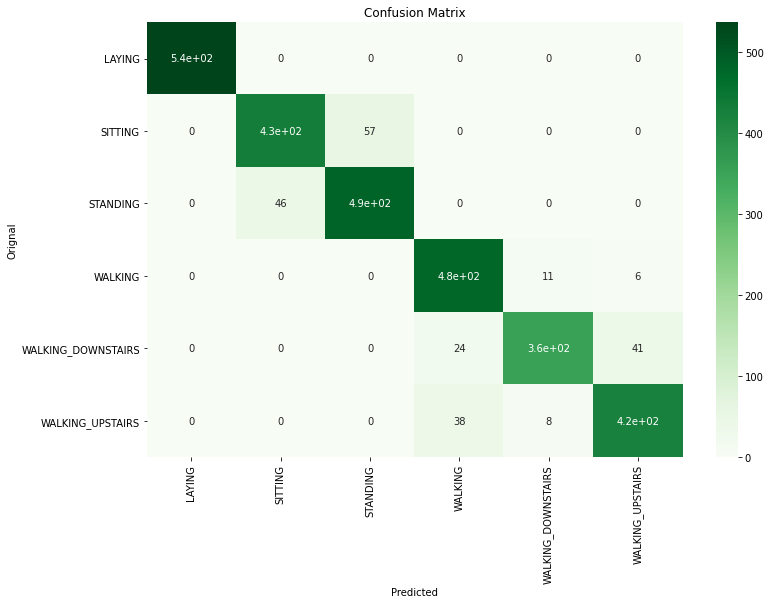

In [35]:
cm = confusion_matrix(y_test.values,y_pred)
# plotting confusion matrix
plt.subplots(figsize = (12,8))
lables = np.unique(y_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', xticklabels=lables, yticklabels=lables)
plt.ylabel('Orignal')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')# plotting confusion matrix

In [36]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=14, n_estimators=90)
Best set of parameters :  {'n_estimators': 90, 'max_depth': 14}
Best score :  0.9177136197782989


### Conclusion

In this kernel we built multiple different models using various classification algorithms. The accuracy obtained through these models is as follows - 


In [44]:

data = {'Logistic':lr_accuracy, 'Linear_SVM':lr_svm_accuracy, 'Kernal_SVM':kernel_svm_accuracy , 'Dicision_Trees':dt_accuracy, 'Random_Forest':rf_accuracy}

pd.DataFrame(data, index = [1])

,Logistic,Linear_SVM,Kernal_SVM,Dicision_Trees,Random_Forest
1,0.957923,0.968782,0.942314,0.873431,0.921615


**Linear_SVM** works best in Above Data Set